In [16]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import pandas as pd
import os
%matplotlib inline

The word topic probability matrix

In [90]:
Pword = np.zeros((3,10))
Pword[0][0] = 0.2
Pword[0][1] = 0.2
Pword[0][2] = 0.5
Pword[0][9] = 0.1

Pword[1][3] = 0.3
Pword[1][4] = 0.3
Pword[1][5] = 0.3
Pword[1][9] = 0.1

Pword[2][6] = 0.2
Pword[2][7] = 0.3
Pword[2][8] = 0.4
Pword[2][9] = 0.1
Pword

array([[ 0.2,  0.2,  0.5,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0.1],
       [ 0. ,  0. ,  0. ,  0.3,  0.3,  0.3,  0. ,  0. ,  0. ,  0.1],
       [ 0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0.2,  0.3,  0.4,  0.1]])

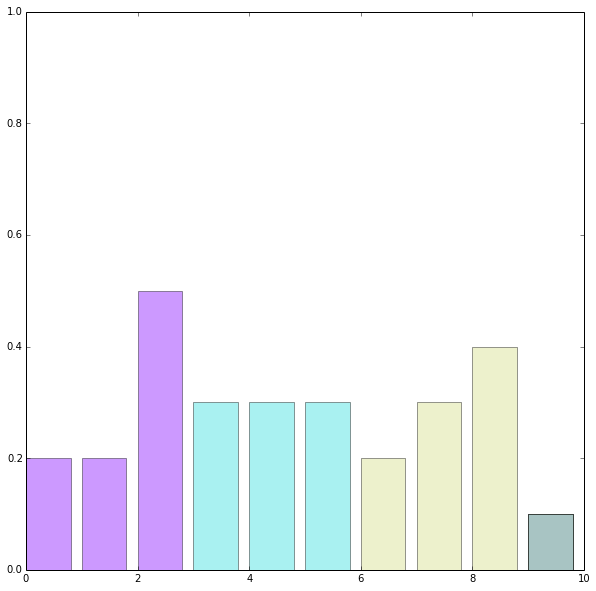

In [98]:
num_topics = 3
num_words = 10

plt.figure(1, figsize=(10,10))
colors = iter(cm.rainbow(np.linspace(0, 1, num_topics+1)))
word_ids = xrange(num_words)

for k in xrange(num_topics):
    plt.bar(word_ids, Pword[k], color=next(colors), alpha=0.4, edgecolor = "none")
    
plt.xlim(0, num_words)
plt.ylim(0,1)
plt.show()

Generate documents

In [135]:
alpha = (0.01, 0.01, 0.01)
#alpha = (1.0, 1.0, 1.0)
numDocs = 100
numWords = 20

corpus_path = os.path.join(os.getcwd(), "..", "datasets", "artificial.dat")
fo = open(corpus_path, "w")

for d in xrange(numDocs):
    topics = np.random.dirichlet(alpha, 1)
    word_counts = np.zeros(10)
    for w in xrange(numWords):
        word_topic = np.random.multinomial(1, topics[0].round(2), size=1)
        topic =  word_topic[0].nonzero()[0][0]
        word = np.random.multinomial(1, Pword[topic], size=1)[0].nonzero()[0][0]
        word_counts[word] = word_counts[word] + 1
    
    doc_line = str(len(word_counts.nonzero()[0])) + " "
    for w in xrange(10):
        if(word_counts[w] != 0):
            doc_line += str(w) + ":" + str(int(word_counts[w])) + " "
    if(d != numDocs - 1):
        doc_line += "\n"
    fo.write(doc_line)
fo.close()

Load the inferred Pword

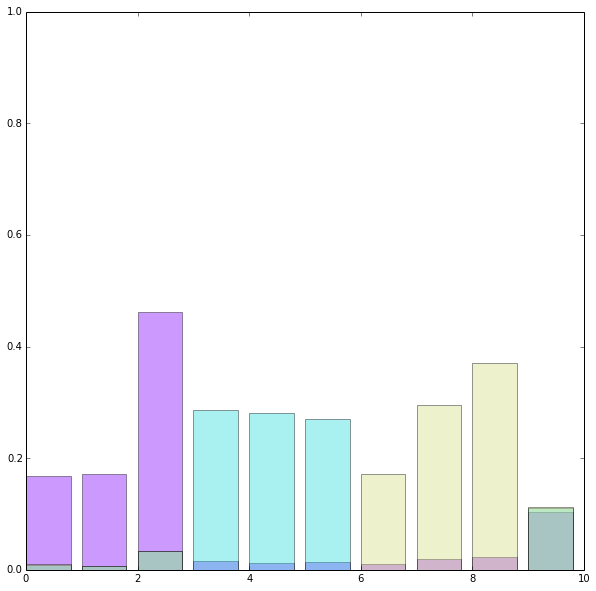

In [141]:
path = os.path.join(os.getcwd(), "..", "param", "artificial", "beta.dat")
beta = pd.read_table(path, sep=" ", header = None)

plt.figure(1, figsize=(10,10))
colors = iter(cm.rainbow(np.linspace(0, 1, num_topics+1)))
word_ids = xrange(num_words)

for k in xrange(num_topics):
    plt.bar(word_ids, beta.loc[k].values, color=next(colors), alpha=0.4, edgecolor = "none")
    
plt.xlim(0, num_words)
plt.ylim(0,1)
plt.show()